# Bayesian model

**NOTAS**
* norm.ppf es phi ^-1 
* norm.cdf es phi
* **RECUERDA QUE SI ES UNEQUAL VARIANCE** : Hay que dividir entre sigma en los cdf
* * norm.cdf(-c1/0.8, 0, 1)

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

$$c=-\phi^{-1}(P_{FP})$$
$$P_{FP}=-\phi(c)$$
$$x > (1/d') \log\left(\frac{{1 - P(s)}}{{P(s)}}\right) + \frac{d'}{2} = c $$
$$d' = \hat{\mu}_s = \Phi^{-1}\left(\hat{P}_T P\right) - \Phi^{-1}\left(\hat{P}_F P\right)$$

In [3]:
mu=1.2
sigma=1.8


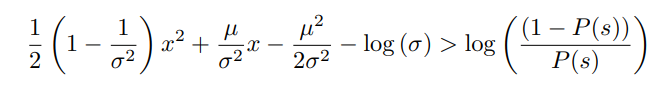

In [17]:
def unequal_bayes(Ps,mu,sigma):
    a=1/2*(1-1/sigma**2)
    b=mu/sigma**2
    c=-mu**2/(2*sigma**2)-np.log(sigma)-np.log((1-Ps)/Ps)
    return a,b,c

In [23]:
def squared_solve(a, b, c):
    # Calcula las soluciones utilizando la función raíz cuadrada de NumPy
    discriminante = np.sqrt(b**2 - 4*a*c)
    
    # Calcula las dos soluciones
    sol1 = (-b + discriminante) / (2*a)
    sol2 = (-b - discriminante) / (2*a)
    sol=np.array([sol1,sol2])
    sol.sort()
    return sol[0], sol[1]

**Recuerda que cdf te da el área de la probabilidad desde -infinito hasta ese valor. Si queremos el área de la derecha debemos hacer 1-norm.cdf(value)**

Caso Ps=1/3

In [28]:
Ps=1/3

a,b,c=unequal_bayes(Ps,mu,sigma)
c_lo, c_hi=squared_solve(a,b,c)

## Caso sin estímulo (mu=0 sigma=1)
P_fp_1=norm.cdf(c_lo,0,1)+(1-norm.cdf(c_hi,0,1))
## Caso con estímulo (mu=1.2 sigma=1.8)
P_tp_1=norm.cdf(c_lo,mu,sigma)+(1-norm.cdf(c_hi,mu,sigma))

print("Para el caso Ps=1/3")
print("False Positive Prob ", P_fp_1)
print("True positive ", P_tp_1)

Para el caso Ps=1/3
False Positive Prob  0.05649479455892466
True positive  0.42370798612311455


In [29]:
Ps=2/3

a,b,c=unequal_bayes(Ps,mu,sigma)
c_lo, c_hi=squared_solve(a,b,c)

## Caso sin estímulo (mu=0 sigma=1)
P_fp_2=norm.cdf(c_lo,0,1)+(1-norm.cdf(c_hi,0,1))
## Caso con estímulo (mu=1.2 sigma=1.8)
P_tp_2=norm.cdf(c_lo,mu,sigma)+(1-norm.cdf(c_hi,mu,sigma))

print("Para el caso Ps=1/3")
print("False Positive Prob ", P_fp_2)
print("True positive ", P_tp_2)

Para el caso Ps=1/3
False Positive Prob  0.49177151913145495
True positive  0.7804621992167927


# Fit unequal variance signal detection

In [30]:
FP=[P_fp_1, P_fp_2]
TP=[P_tp_1, P_tp_2]

In [1]:
def ROC_curve(sigma, mu):
    x=np.linspace(0,1,100)
    y=[]
    for i in x:
        y.append((1/sigma)*norm.ppf(i, 0, 1) + mu/sigma)
    y_fp=[]
    for i in y:
        y_fp.append(norm.cdf(i,0,1))
    return x, y_fp

In [32]:
from sklearn.linear_model import LinearRegression
# Crear un objeto de regresión lineal
regression = LinearRegression()
FP_trans=[norm.ppf(i,0,1) for i in FP]
TP_trans=[norm.ppf(i,0,1) for i in TP]
regression.fit(np.array(FP_trans).reshape(-1, 1), TP_trans)
# Obtener los coeficientes de la regresión
a = regression.coef_[0]
b = regression.intercept_

sigma_est=1/a
mu_est=b*sigma_est

In [33]:
FP_fit, TP_fit=ROC_curve(sigma_est, mu_est)

In [34]:
FP_real, TP_real=ROC_curve(sigma, mu)

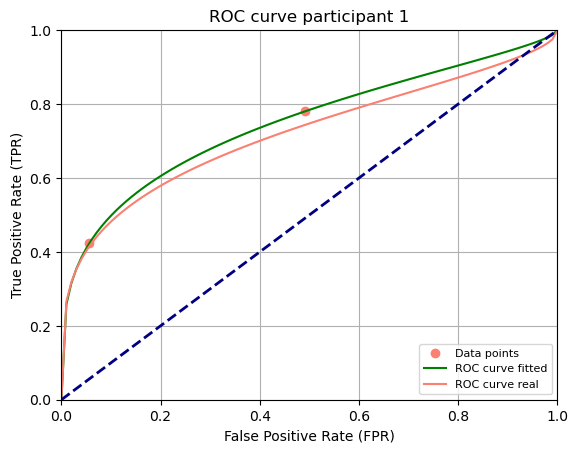

In [35]:
plt.figure()
plt.plot(FP, TP, 'o', color="salmon", label="Data points")
plt.plot(FP_fit, TP_fit, color="green", label="ROC curve fitted")
plt.plot(FP_real, TP_real, color="salmon", label="ROC curve real")
#a2, b2=ROC_curve(0.7, 0.8)
#plt.plot(a2, b2, color="red", label="ROC curve fitted 2")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve participant 1')
plt.grid()
plt.legend(loc='lower right', fontsize=8)
plt.show()

In [36]:
print("La mu real es ", mu, " y la mu estimada es ", mu_est)
print("La sigma real es ", sigma, "y la sigma estimada es ", sigma_est)

La mu real es  1.2  y la mu estimada es  1.2733676702707624
La sigma real es  1.8 y la sigma estimada es  1.6190399122569343
